## Przygotowanie struktury zbioru danych z katalogu plików

In [2]:
import os
import cv2
import numpy as np

def category_to_number(category: str) -> int:
    mapping = {
        'flower': 0,
        'leaf': 1,
        'stone': 2,
        'wood': 3, 
    }
    return mapping[category]

def load_images_from_folder(folder):
    images = []
    categories = sorted(os.listdir(folder))
    for category_index, category in enumerate(categories):
        category_path = os.path.join(folder, category)
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            if img_path.endswith(".jpg"):
                img = cv2.imread(img_path)
                if img is not None:
                    images.append({"image": img, 
                                   "category": category,
                                   "label": category_to_number(category)
                                   })
    return images

train = load_images_from_folder("dataset_v3/train")
valid = load_images_from_folder("dataset_v3/valid")
test = load_images_from_folder("dataset_v3/test")

In [3]:
print(train[0]["image"])
print(train[0]["category"])
print(train[0]["label"])

[[[132 176 207]
  [133 177 208]
  [133 177 208]
  ...
  [126 167 199]
  [126 167 199]
  [126 167 199]]

 [[133 177 208]
  [133 177 208]
  [133 177 208]
  ...
  [126 167 199]
  [126 167 199]
  [126 167 199]]

 [[135 179 210]
  [134 178 209]
  [132 176 207]
  ...
  [126 167 199]
  [126 167 199]
  [126 167 199]]

 ...

 [[116 157 189]
  [116 157 189]
  [116 157 189]
  ...
  [112 152 181]
  [112 152 181]
  [112 152 181]]

 [[115 156 188]
  [115 156 188]
  [115 156 188]
  ...
  [112 152 181]
  [112 152 181]
  [112 152 181]]

 [[115 156 188]
  [115 156 188]
  [115 156 188]
  ...
  [112 152 181]
  [112 152 181]
  [112 152 181]]]
flower
0


In [4]:
# image1 = train_images[1]
# image2 = train_images_norm[1]
# cv2.imshow('RGB Image', image1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Normalizacja danych

In [5]:
def normalize(dataset):
    mean = np.mean(dataset)
    std_dev = np.std(dataset)
    return (dataset - mean) / std_dev

train_images = [x["image"] for x in train]
valid_images = [x["image"] for x in valid]
test_images = [x["image"] for x in test]

train_images_norm = normalize(train_images)
valid_images_norm = normalize(valid_images)
test_images_norm = normalize(test_images)

In [6]:
for idx, img in enumerate(train_images_norm):
    train[idx]["image_norm"] = train_images_norm[idx]

for idx, img in enumerate(valid_images_norm):
    valid[idx]["image_norm"] = valid_images_norm[idx]

for idx, img in enumerate(test_images_norm):
    test[idx]["image_norm"] = test_images_norm[idx]

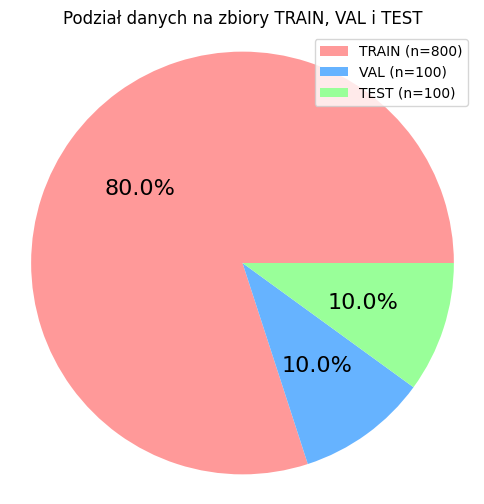

In [7]:
import matplotlib.pyplot as plt

sizes = [len(train), len(valid), len(test)]
labels = [f'TRAIN (n={len(train)})', f'VAL (n={len(valid)})', f'TEST (n={len(test)})']

colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 16})
plt.legend(labels, loc='upper right')
plt.axis('equal')
plt.title('Podział danych na zbiory TRAIN, VAL i TEST')
plt.show()


In [8]:
normalized = True
dataset_name = "train"

image_type = "image_norm" if normalized else "image"
if dataset_name == "train": dataset = train
elif dataset_name == "valid": dataset = valid
elif dataset_name == "test": dataset = test


img = np.array([image[image_type].flatten() for image in dataset])
lab = np.array([image["label"] for image in dataset])

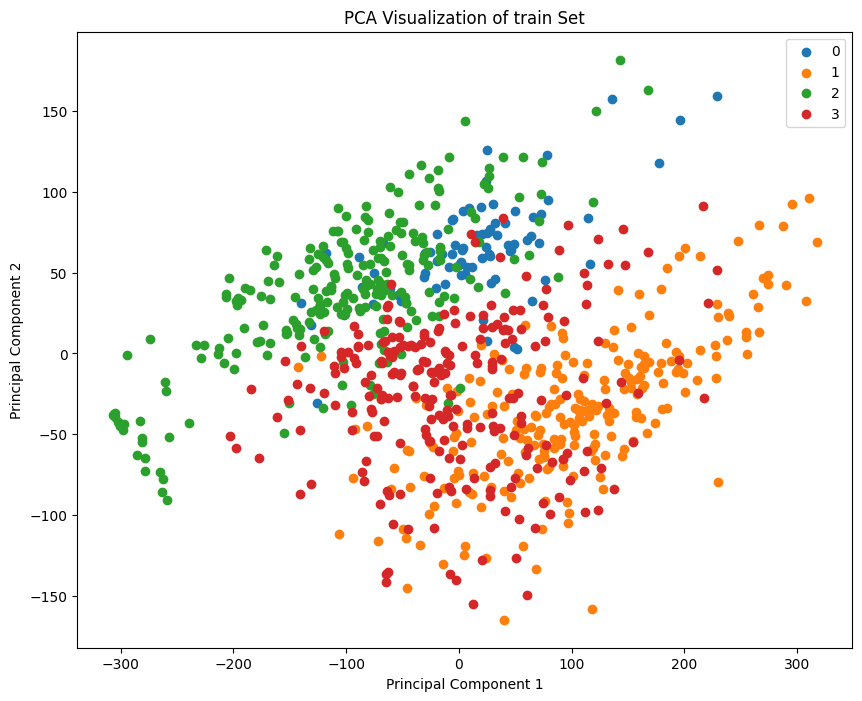

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(img)

# Plot PCA results
plt.figure(figsize=(10, 8))
for label in np.unique(lab):
    indices = lab == label
    plt.scatter(pca_results[indices, 0], pca_results[indices, 1], label=label)
plt.title(f'PCA Visualization of {dataset_name} Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [11]:
train_images_stacked = np.stack([image["image"] for image in train])
train_images_stacked_norm = np.stack([image["image_norm"] for image in train])

mean_pixel_value = np.mean(train_images_stacked)
std_pixel_value = np.std(train_images_stacked)

print("Mean pixel value:", mean_pixel_value)
print("Standard deviation of pixel values:", std_pixel_value)

mean_pixel_value = np.mean(train_images_stacked_norm)
std_pixel_value = np.std(train_images_stacked_norm)

print("Mean pixel value:", mean_pixel_value)
print("Standard deviation of pixel values:", std_pixel_value)

Mean pixel value: 168.95692225138347
Standard deviation of pixel values: 60.818625465658265
Mean pixel value: -3.6572596802860363e-16
Standard deviation of pixel values: 1.0000000000000013


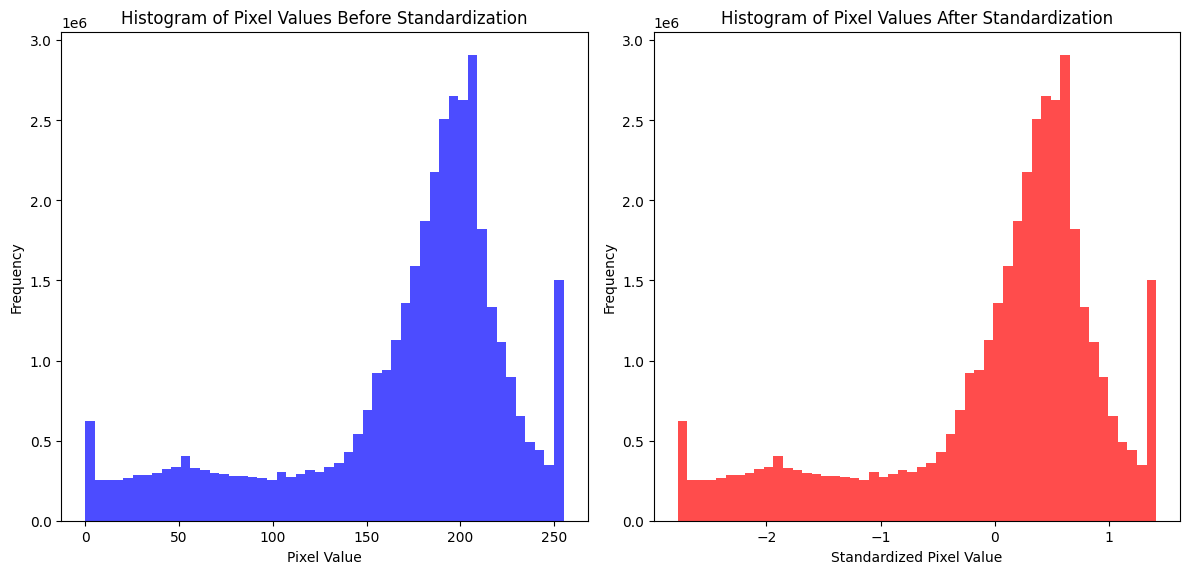

In [12]:
# Extract pixel values from the stacked image array
pixel_values_before_standardization = train_images_stacked.flatten()
pixel_values_after_standardization = train_images_stacked_norm.flatten()


# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(pixel_values_before_standardization, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Pixel Values Before Standardization')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(pixel_values_after_standardization, bins=50, color='red', alpha=0.7)
plt.title('Histogram of Pixel Values After Standardization')
plt.xlabel('Standardized Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import cohen_kappa_score

annotator1 = [0, 1, 2, 0, 1]
annotator2 = [0, 1, 2, 0, 1]

kappa = cohen_kappa_score(annotator1, annotator2)

print("Współczynnik Cohen's Kappa:", kappa)

Współczynnik Cohen's Kappa: 1.0
